# Análisis Exploratorio de Datos (EDA): 

## Objetivo
Este notebook contiene el análisis exploratorio completo del dataset, siguiendo una estructura organizada y metódica para entender los datos, limpiarlos y prepararlos para modelado.

## Contenido
1. Configuración Inicial y librearías
2. Limpieza
    - Carga de datos sucios
3. Análisis Exploratorio de los Datos
    - Carga de datos limpios
4. Análisis estadístico
5. Análisis Univariante
6. Análisis Bivariante

# 1. Configuración Inicial

Importamos las bibliotecas necesarias y configuramos el entorno de trabajo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import os
import re

### Configuración del estilo visual

In [10]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [1]:
# Setting paths
current_dir = os.getcwd()  # Use os.getcwd() to get the current working directory
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
cars_csv_path = os.path.join(data_dir, "df_integrado_completo.csv")
#----------------------------------------------------------------------------------------------------
# Creading dataframes
df_data = pd.read_csv(cars_csv_path)

NameError: name 'os' is not defined

In [29]:
df_clean_data = pd.read_csv("df_integrado_completo.csv")
df_clean_data.head(20)

,entity,year,schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,origen_dataset,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_eating_disorders,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders,major_depression,bipolar_disorder,eating_disorders,dysthymia,schizophrenia,anxiety_disorders,"potentially_adequate_treatment,_conditional","other_treatments,_conditional","untreated,_conditional",nearly_every_day,more_than_half_the_days,several_days,not_at_all,number_of_countries_with_primary_data_on_prevalence_of_mental_disorders
0,Afghanistan,1990,0.223206,"4,996,118","4,713,314",0.70302314,0.12770003,Prevalencia_Enfermedades_Mentales,"89,522,565","13,824,825","14,764,412","26,471,115",440.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1991,0.222454,"49,892,898","47,021",0.7020688,0.123255946,Prevalencia_Enfermedades_Mentales,"89,388,434","13,776,122","14,756,696","25,548,681","43,947,202",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1992,0.221751,"49,813,457","4,683,743",0.700792,0.11884415,Prevalencia_Enfermedades_Mentales,"89,234,973","1,370,803","14,713,086","24,637,949","43,760,718",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1993,0.220987,"49,769,583","46,735,487",0.70008695,0.11508888,Prevalencia_Enfermedades_Mentales,"89,151,587","13,648,602","14,678,812","23,863,169","43,669,104",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1994,0.220183,"4,977,782","467,081",0.6998978,0.11181468,Prevalencia_Enfermedades_Mentales,"8,913,916","13,618,323","14,658,481","23,189,074","436,768",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1995,0.219409,"4,978,228","46,681",0.6997684,0.10850699,Prevalencia_Enfermedades_Mentales,"89,121,344","13,565,398","14,663,217","22,503,244","43,669,098",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,1996,0.218465,"4,981,489","46,657,586",0.6996502,0.10526882,Prevalencia_Enfermedades_Mentales,"89,192,096","13,516,324","14,667,957","21,827,526","43,652,713",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1997,0.217286,"49,875,927","4,665,013",0.69959736,0.10153082,Prevalencia_Enfermedades_Mentales,"89,302,045","1,342,036","14,654,947","21,124,723","43,642,557",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1998,0.216074,"49,968,576","46,682,405",0.69976467,0.09805014,Prevalencia_Enfermedades_Mentales,"8,947,368","13,356,137","14,669,704","20,412,657","4,367,702",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1999,0.215068,"5,004,257","46,735,573",0.700054,0.095722646,Prevalencia_Enfermedades_Mentales,"89,613,806","13,282,457","14,676,817","19,931,143","43,712,753",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 27 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   entity                                                                             6812 non-null   object 
 1   year                                                                               6812 non-null   object 
 2   schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized  6424 non-null   float64
 3   depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized     6420 non-null   object 
 4   anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized        6420 non-null   object 
 5   bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized        6420 non-null   objec

In [31]:
df_clean_data.describe()

,schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,major_depression,bipolar_disorder,eating_disorders,dysthymia,anxiety_disorders,"potentially_adequate_treatment,_conditional","other_treatments,_conditional","untreated,_conditional",nearly_every_day,more_than_half_the_days,several_days,not_at_all,number_of_countries_with_primary_data_on_prevalence_of_mental_disorders
count,6424.000000,44.000000,22.000000,22.000000,22.000000,22.000000,22.000000,26.000000,26.000000,14.000000,10.000000,10.000000,10.000000,15.000000
mean,1.517528,28.995455,15.931818,14.577273,17.372727,34.181818,8.690909,14.950000,66.326923,24.271429,4.260000,15.000000,76.310000,56.733333
std,50.119039,32.841373,28.352431,25.455918,29.174127,35.825870,5.399816,5.992078,23.426798,33.237199,2.067312,8.554271,13.162949,46.172760
min,0.188416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,8.500000,0.600000,0.600000,2.300000,49.100000,2.000000
25%,0.242344,1.300000,0.000000,0.000000,0.000000,0.925000,3.225000,10.700000,63.850000,3.525000,3.075000,11.050000,74.050000,31.000000
50%,0.273496,15.250000,2.750000,0.000000,0.850000,23.900000,10.000000,13.800000,70.550000,4.500000,4.100000,15.250000,76.000000,41.000000
75%,0.286613,47.000000,14.100000,18.200000,23.050000,63.925000,12.750000,19.875000,81.475000,43.475000,5.325000,16.675000,82.475000,63.000000
max,2012.000000,100.000000,100.000000,89.800000,100.000000,100.000000,16.100000,26.200000,91.800000,82.700000,7.800000,34.000000,96.600000,172.000000


## Analisis exploratorio de datos

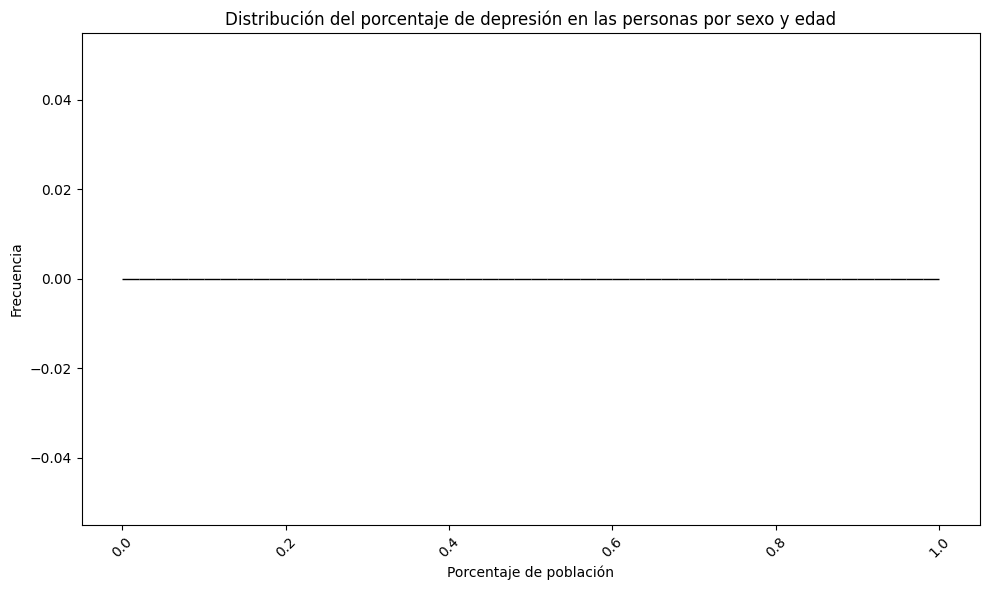

In [36]:
df_data = pd.read_csv("df_integrado_completo.csv")  

# 2. Preprocesamiento: convierte la columna a numérica si es necesario
df_clean_data = df_data.copy()
col_name = 'depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'
df_clean_data[col_name] = pd.to_numeric(df_clean_data[col_name], errors='coerce')

# 3. Genera el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_data[col_name], bins=50, kde=True, color='skyblue')
plt.title('Distribución del porcentaje de depresión en las personas por sexo y edad')
plt.xlabel('Porcentaje de población')
plt.ylabel('Frecuencia')

# Solo si los valores son numéricos muy grandes o pequeños:
# plt.ticklabel_format(axis='x', style='plain')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


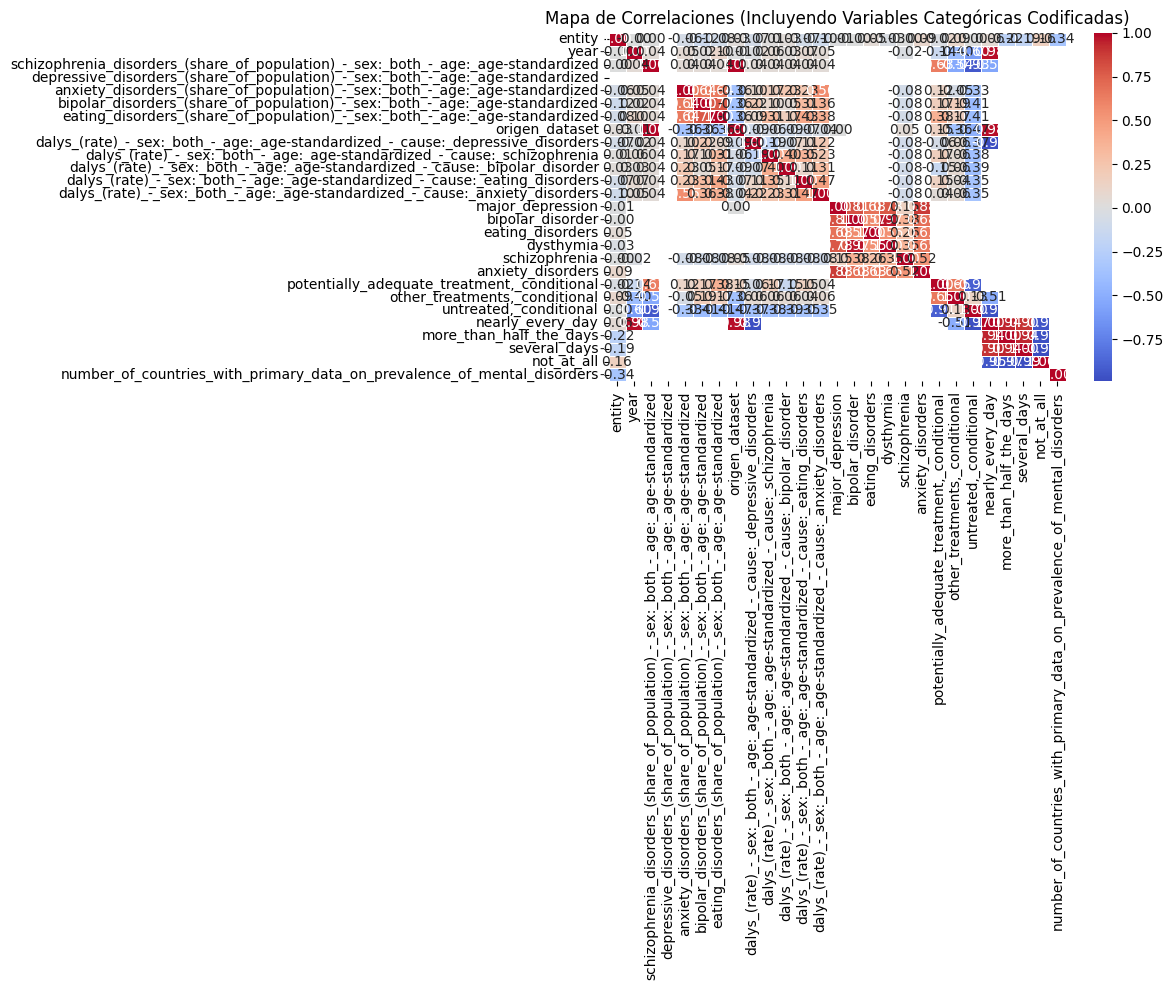

In [37]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_clean_data.copy()

# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlaciones (Incluyendo Variables Categóricas Codificadas)')
plt.tight_layout()
plt.show()

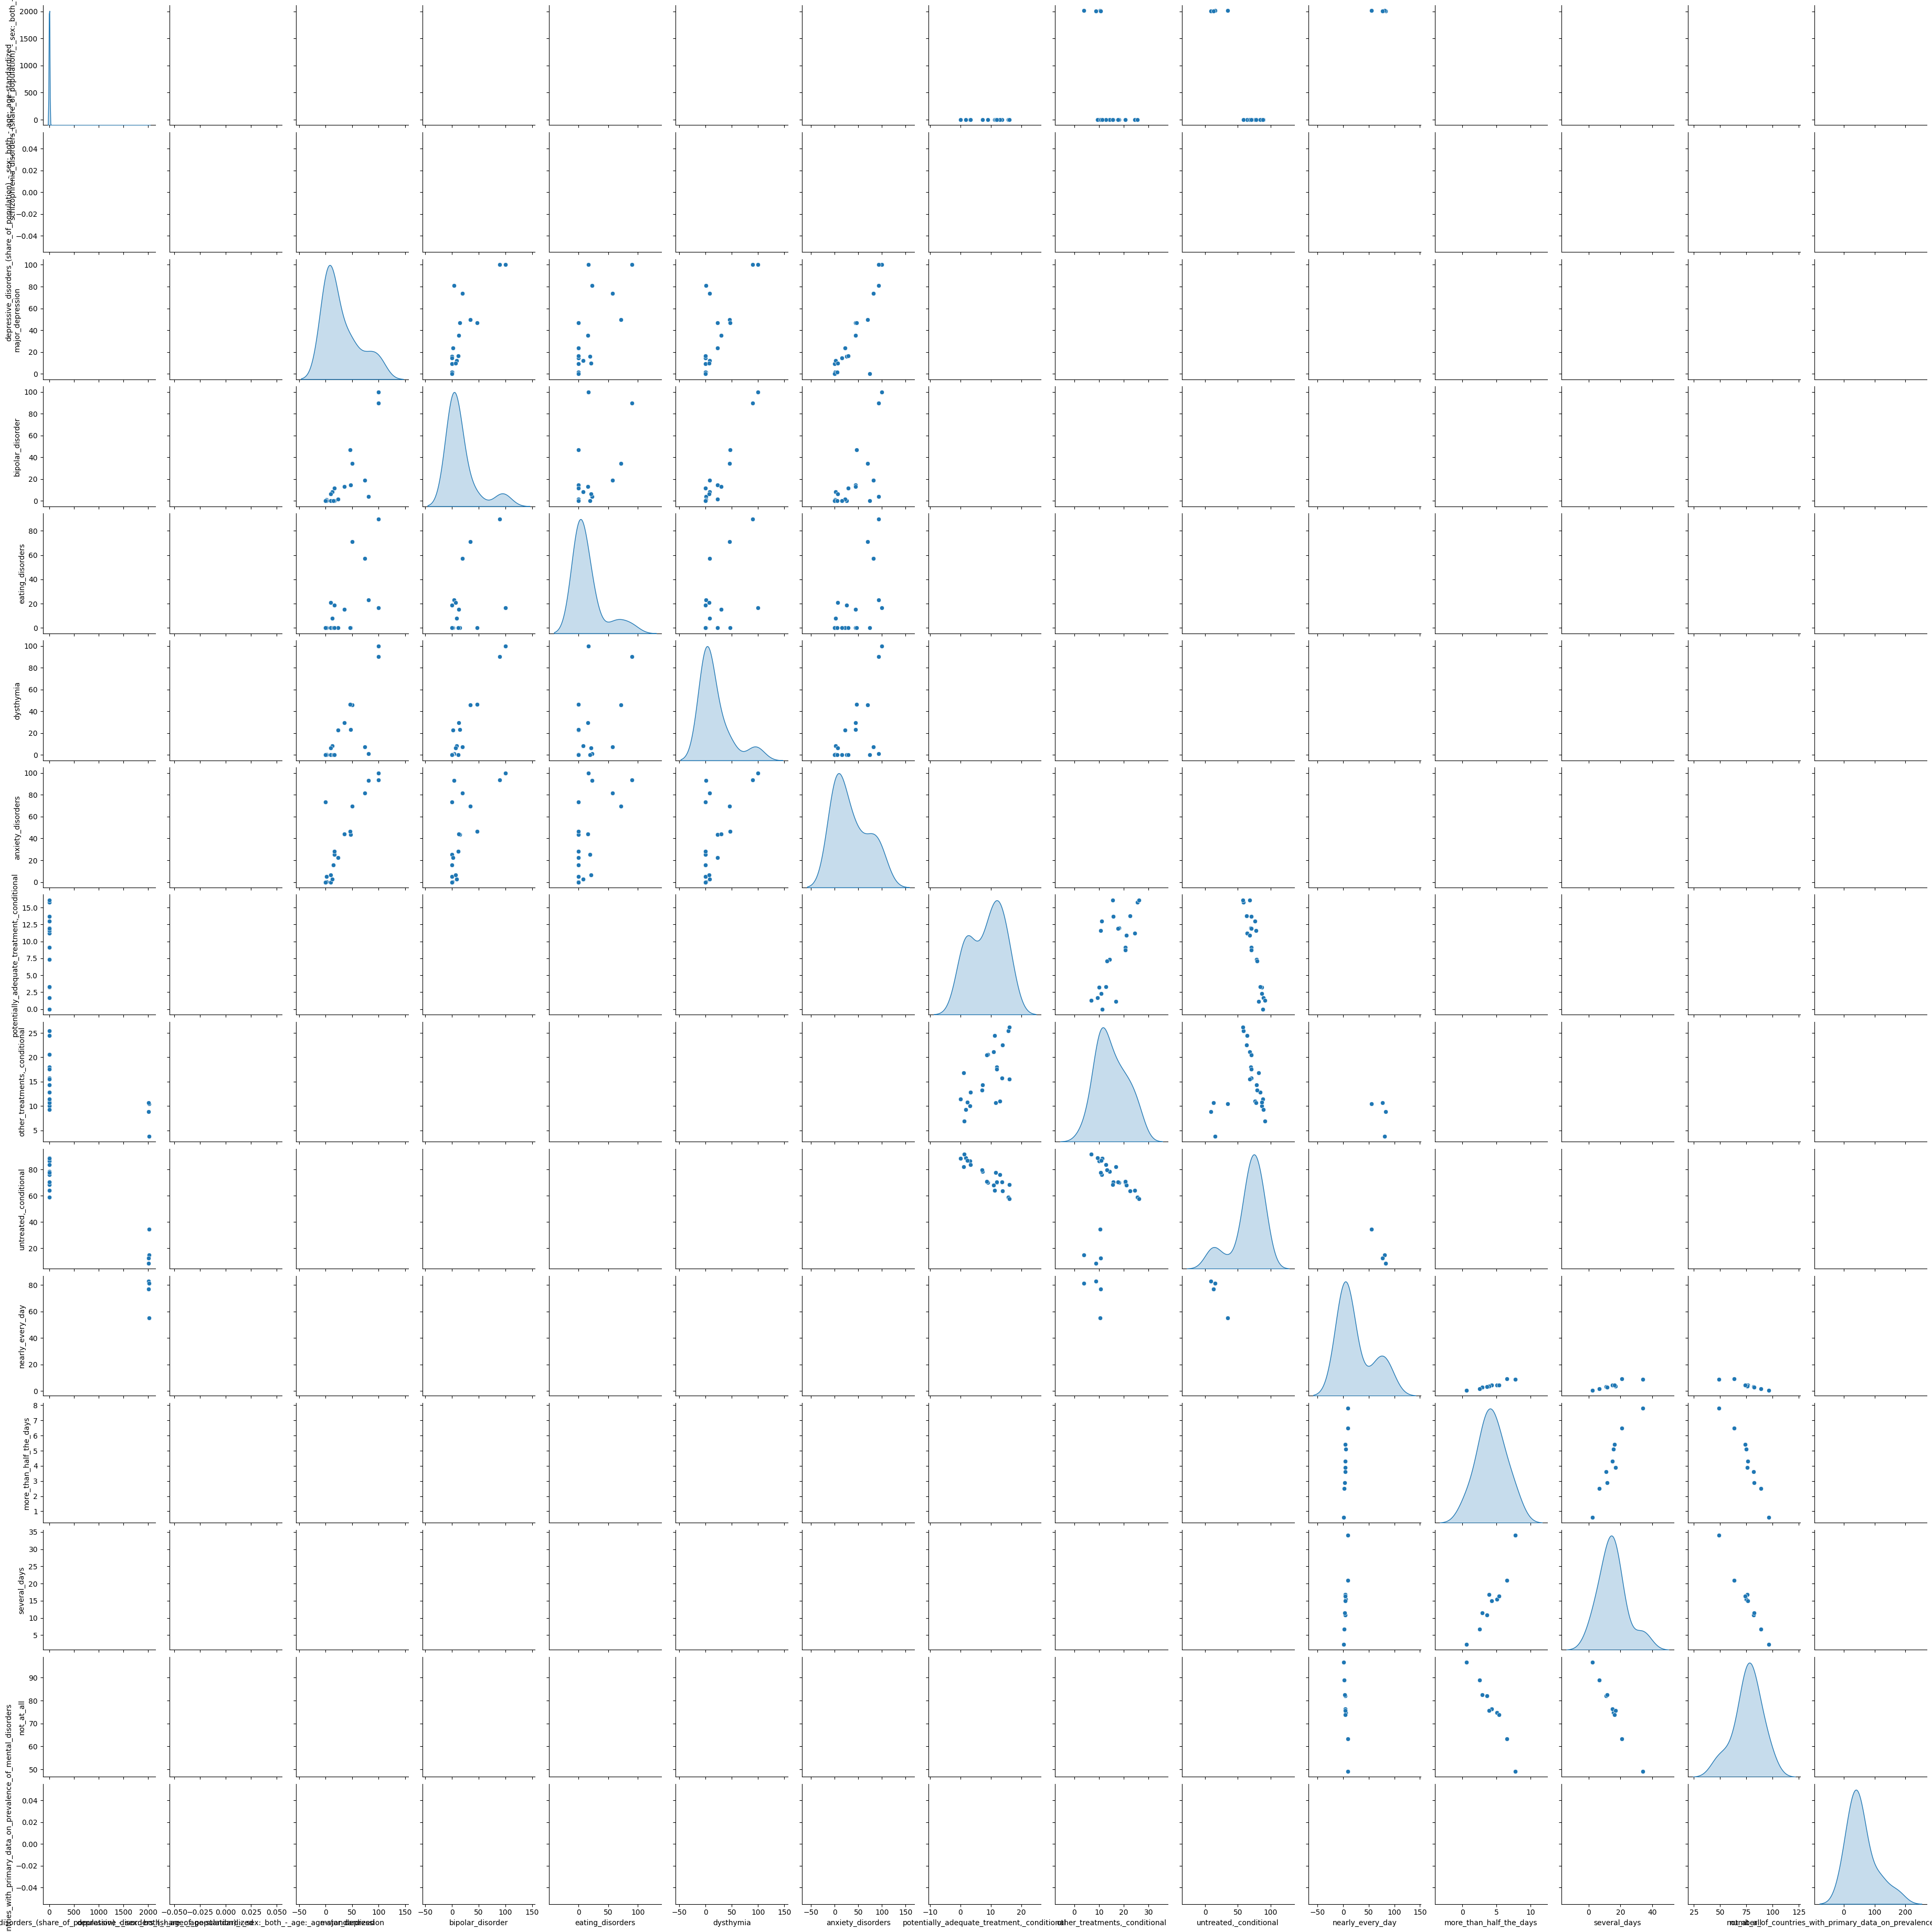

<Figure size 1000x800 with 0 Axes>

In [38]:
sns.pairplot(df_clean_data, diag_kind='kde')
plt.figure(figsize=(10, 8))
plt.suptitle('Relación entre Variables Numéricas', y=1.02)
plt.show()